# TF-IDF vectorized output passed into Random Forest Regressor model

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

%run -i ./Model_Eval.ipynb

In [2]:
training_data = pd.read_csv("../Training_Data/one_star_reviews_balanced.csv")

In [3]:
# training_data = training_data.head(10000) # just testing it out to make it faster

In [4]:
training_data.head(3)

,full_text,reviewer_avg_rating
0,it is very poor quality. The color looks like ...,4.000000
1,Poor quality Sticks and has excessive play loc...,2.777778
2,Was nice until they doubled the price I was ju...,2.222222


In [5]:
features = training_data['full_text']
labels = training_data['reviewer_avg_rating']

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size = 0.33, random_state = 42)

In [7]:
def clean(text):
    wn = nltk.WordNetLemmatizer()
    stopword = nltk.corpus.stopwords.words('english')
    tokens = nltk.word_tokenize(text)
    lower = [word.lower() for word in tokens]
    no_stopwords = [word for word in lower if word not in stopword]
    no_alpha = [word for word in no_stopwords if word.isalpha()]
    lemm_text = [wn.lemmatize(word) for word in no_alpha]
    clean_text = lemm_text
    return clean_text

In [8]:
def vectorize(data,tfidf_vect_fit):
    X_tfidf = tfidf_vect_fit.transform(data)
    words = tfidf_vect_fit.get_feature_names()
    X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
    X_tfidf_df.columns = words
    return(X_tfidf_df)

In [9]:
tfidf_vect = TfidfVectorizer(analyzer=clean, max_features=1000)

tfidf_vect_fit=tfidf_vect.fit(X_train)

In [10]:
X_train_vect = vectorize(X_train, tfidf_vect_fit)
X_test_vect = vectorize(X_test, tfidf_vect_fit)

/home/tychi/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/home/tychi/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [12]:
regr = RandomForestRegressor(max_depth=30, random_state=0, n_jobs=16, verbose=3)

In [13]:
history = regr.fit(X_train_vect, Y_train)

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed: 135.9min finished


[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    7.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    3.9s finished


Train R2 score is 0.10857
Test R2 score is 0.044011


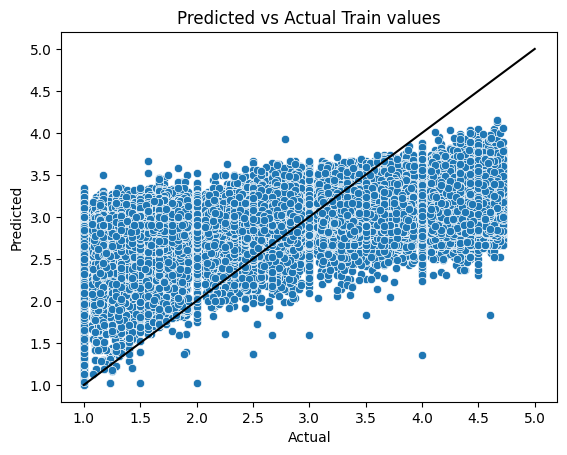

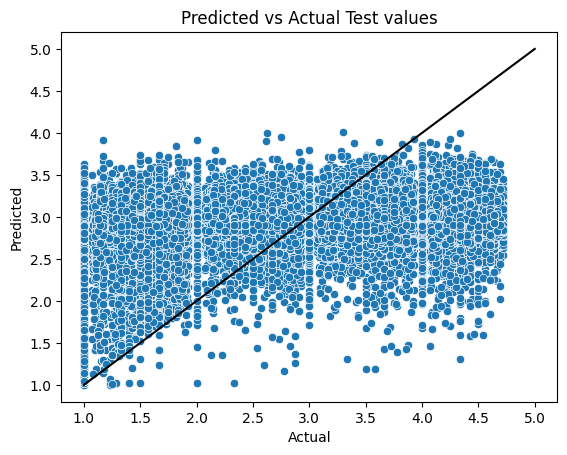

In [14]:
evaluate_regression_model(
    regr,
    None,
    X_train_vect,
    Y_train,
    X_test_vect,
    Y_test
)